## Stats701-001 Homework 6, Winter 2018
### Ben Denis Shaffer
#### bdshaff@umich.edu

### Problem 1:  Warmup: plotting CLTs

In [2]:
import scipy.stats as ss
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
samp_size = 20
samp_quant = 1000

In [4]:
laplace_samp = ss.laplace.rvs(size = samp_size*samp_quant)/np.sqrt(2)
laplace_samp.shape = (samp_quant, samp_size)
mus1 = laplace_samp.mean(axis = 1)

In [5]:
exp_samp = ss.expon.rvs(size = samp_size*samp_quant) - 1
exp_samp.shape = (samp_quant, samp_size)
mus2 = exp_samp.mean(axis = 1)

In [6]:
beta_samp = (ss.beta.rvs(2, 2, size = samp_size*samp_quant) - 0.5)/np.sqrt(1/20)
beta_samp.shape = (samp_quant, samp_size)
mus3 = beta_samp.mean(axis = 1)

In [7]:
chi2_samp = (ss.chi2.rvs(12, size = samp_size*samp_quant) - 12)/np.sqrt(24)
chi2_samp.shape = (samp_quant, samp_size)
mus4 = chi2_samp.mean(axis = 1)

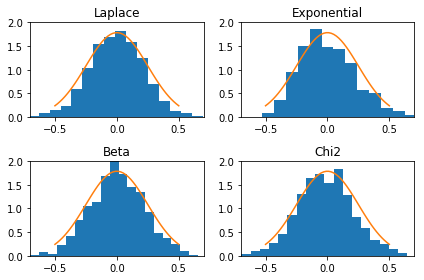

In [8]:
plt.subplot(2,2,1)
plt.hist(mus1,samp_size, normed = True)
plt.plot(np.linspace(-0.5,0.5,50), ss.norm.pdf(np.linspace(-2,2,50))*np.sqrt(samp_size))
plt.xlim([-0.7,0.7])
plt.ylim([0,2])
plt.title("Laplace")
plt.subplot(2,2,2)
plt.hist(mus2,samp_size, normed = True)
plt.plot(np.linspace(-0.5,0.5,50), ss.norm.pdf(np.linspace(-2,2,50))*np.sqrt(samp_size))
plt.xlim([-0.7,0.7])
plt.ylim([0,2])
plt.title("Exponential")
plt.subplot(2,2,3)
plt.hist(mus3,samp_size, normed = True)
plt.plot(np.linspace(-0.5,0.5,50), ss.norm.pdf(np.linspace(-2,2,50))*np.sqrt(samp_size))
plt.xlim([-0.7,0.7])
plt.ylim([0,2])
plt.title("Beta")
plt.subplot(2,2,4)
plt.hist(mus4,samp_size, normed = True)
plt.plot(np.linspace(-0.5,0.5,50), ss.norm.pdf(np.linspace(-2,2,50))*np.sqrt(samp_size))
plt.xlim([-0.7,0.7])
plt.ylim([0,2])
plt.title("Chi2")
_ = plt.tight_layout()

All four distributions look approximatly normal judging by the histograms, though qq-plots would be a better way to explore. Exponential distribution seems slightly right skewed, while Laplace seems to still have slightly heavier tails/larger kurtosis, though it is hardly noticible.

### Problem 2:  Plotting a Mixture of Normals 

In [9]:
mat = np.loadtxt("hw6_files/points.dlm")
vec = np.load("hw6_files/labels.npy")

mu1 = np.array([0.2,0.7])
sig1 = np.array([[0.015,-0.011],[-0.011,0.018]])
mvn1 = ss.multivariate_normal(mu1,sig1)

mu2 = np.array([0.65,0.3])
sig2 = np.array([[0.016,-0.011],[-0.011,0.016]])
mvn2 = ss.multivariate_normal(mu2,sig2)

x,y = np.mgrid[0:1:0.01, 0:1:0.01]
pos = np.empty(x.shape + (2,))
pos[:,:,1] = y
pos[:,:,0] = x

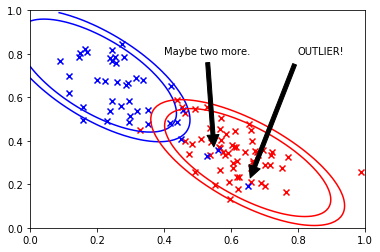

In [10]:
plt.scatter(mat[vec == 1,0],mat[vec == 1,1], marker = "x", c = "r")
plt.scatter(mat[vec == 0,0],mat[vec == 0,1], marker = "x", c = "b")
plt.ylim([0,1])
plt.xlim([0,1])
plt.contour(x,y, mvn1.pdf(pos), levels = [1,2], colors = "b")
plt.contour(x,y, mvn2.pdf(pos), levels = [1,2], colors = "r")
plt.annotate("OUTLIER!", xy = (0.65,0.2), xytext = (0.8,0.8),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.annotate("Maybe two more.", xy = (0.55,0.35), xytext = (0.4,0.8),
             arrowprops=dict(facecolor='black', shrink=0.05))

It seems like the data come from a hevier tailed distribution. We note some possible outliers.

### Problem 3:  Conway’s Game of Life

In [11]:
board = np.zeros((20,20))
tl = np.array([0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0])
tl.shape = (5,5)

In [12]:
board[0:5,0:5] = tl

In [13]:
def is_valid_board(array):
    if type(board) != np.ndarray:
        return(False)
    elif np.any(board > 1):
        return(False)
    elif np.any(board < 0):
        return(False)
    else:
        return(True)

In [14]:
is_valid_board(board)

True

In [15]:
def gol_step(board):
    if is_valid_board(board):
        next_board = np.copy(board)
        
        n = np.arange(board.shape[0])
        m = np.arange(board.shape[1])
        
        t1 = list(board[0,:])
        t1.append(board[0,0])
        t1 = np.array(t1)
        t2 = np.column_stack((board,board[:,0]))
        
        board = np.row_stack((t2, t1))
        

        for i in n:
            for j in m:
                
                ij_neighbors = np.array([0,0,0,0,0,0,0,0])

                ij_neighbors[0] = board[i-1, j-1] #upper left
                ij_neighbors[1] = board[i,   j-1] #above
                ij_neighbors[2] = board[i+1, j-1] #upper right
                ij_neighbors[3] = board[i-1, j  ] #left
                ij_neighbors[4] = board[i+1, j  ] #right
                ij_neighbors[5] = board[i-1, j+1] #lower left
                ij_neighbors[6] = board[i,   j+1] #below
                ij_neighbors[7] = board[i+1 ,j+1] #lower right

                if board[i,j] == 1:
                    if ij_neighbors.sum() < 2:
                        next_board[i,j] = 0
                    elif ij_neighbors.sum() > 3:
                        next_board[i,j] = 0
                    else:
                        next_board[i,j] = 1    
                elif board[i,j] == 0:
                    if ij_neighbors.sum() == 3:
                        next_board[i,j] = 1
                    else:
                        next_board[i,j] = 0
            
        return(next_board)
        
    else:
        raise TypeError()

In [16]:
def draw_gol_board(board):
    plt.xticks([])
    plt.yticks([])
    plt.imshow(board, cmap='Greys')

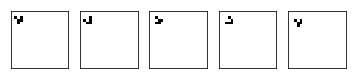

In [17]:
for i in range(5):
    board = gol_step(board)
    plt.subplot(1,5,i+1)
    draw_gol_board(board)